Inspired by [here](https://www.kaggle.com/code/andradaolteanu/sentiment-analysis-rick-and-morty-scripts/notebook)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Data/RickAndMortyScripts.csv')

In [3]:
df.head()

,index,season no.,episode no.,episode name,name,line
0,0,1,1,Pilot,Rick,Morty! You gotta come on. Jus'... you gotta co...
1,1,1,1,Pilot,Morty,"What, Rick? What’s going on?"
2,2,1,1,Pilot,Rick,"I got a surprise for you, Morty."
3,3,1,1,Pilot,Morty,It's the middle of the night. What are you tal...
4,4,1,1,Pilot,Rick,"Come on, I got a surprise for you. Come on, h..."


In [4]:
df.groupby(by=["season no.","episode no."]).count()

index  episode name  name  line
season no. episode no.                                 
1          1              241           241   241   241
           2              222           222   222   222
           6               71            71    71    71
2          1              239           239   239   239
           5              221           221   221   221
           8               73            73    73    73
           10               8             8     8     8
3          1              215           215   215   215
           3              189           189   189   189
           4              257           257   257   257
           7              169           169   169   169

In [5]:
episode_count = df.groupby(['name', 'episode name']).size().reset_index(name='episode_count')

In [6]:
average_episode_participation = episode_count.groupby('name')['episode_count'].mean().sort_values(ascending=False)

In [7]:
top_characters = average_episode_participation[average_episode_participation > 2].index
average_episode_participation = average_episode_participation[top_characters]

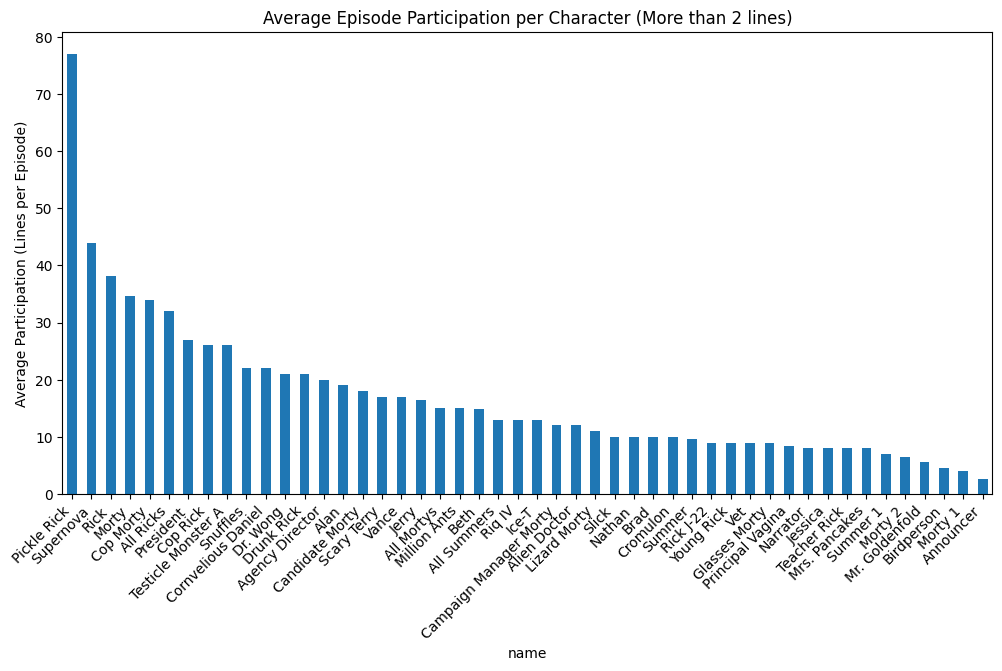

In [8]:
# Plot the average episode participation for the characters

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
average_episode_participation.plot(kind='bar')  # Use a bar chart for comparison
plt.title('Average Episode Participation per Character (More than 2 lines)')
plt.ylabel('Average Participation (Lines per Episode)')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.show()